In [1]:
import pyVHR

In [2]:
from pyVHR.analysis.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
import heartpy as hp

## Video to rPPG

In [12]:

video_fiename = "vid.avi"
pipe  = Pipeline()
timeES, median_bpm, mad_bpm, bpvs = pipe.run_on_video(
    videoFileName = video_fiename,
    method="cpu_POS",
    post_filt=False,
    video_duration=68
)


Processing Video: vid.avi


c:\Users\ACER\miniconda3\envs\pyvhr\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



[array([[ 0.        , -0.00159757, -0.00375168, ...,  0.00022178,
         0.00049147, -0.00013256]])]
1
1989


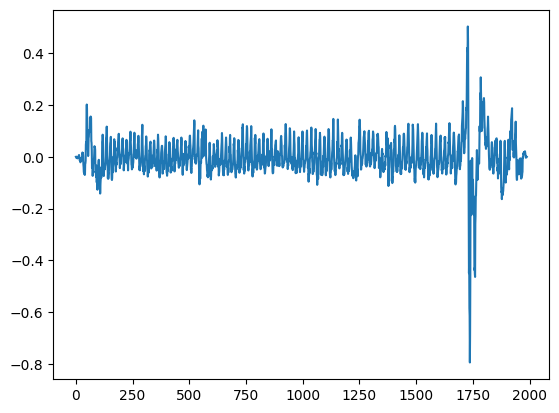

In [13]:
## Print the bpvs
print(bpvs)
print(len(bpvs[0]))
print(len(bpvs[0][0]))

signal = bpvs[0][0]
plt.plot(signal)

In [54]:
from inspect import getmembers, isfunction

av_meths = getmembers(pyVHR.BVP.methods, isfunction)
available_methods = [am[0] for am in av_meths]
print(f"Available methods: {available_methods}")


Available methods: ['cpu_CHROM', 'cpu_GREEN', 'cpu_ICA', 'cpu_LGI', 'cpu_PBV', 'cpu_PCA', 'cpu_POS', 'cpu_SSR', 'jadeR', 'torch_CHROM']


## Filtering PPG

In [99]:
rPPG_filtered = hp.filter_signal(
    data = signal[0:1700],
    filtertype = 'bandpass',
    cutoff = [1.25, 1.7],
    sample_rate = 30,
)

detected_peaks = find_peaks(rPPG_filtered, prominence=0.01)

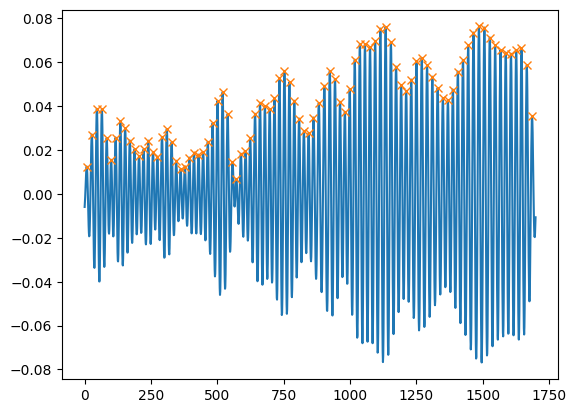

91


In [101]:
plt.plot(rPPG_filtered)
plt.plot(detected_peaks[0], rPPG_filtered[detected_peaks[0]], "x")
plt.show()
print(len(detected_peaks[0]))